In [1]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.linear_model import LinearRegression,ElasticNet, ElasticNetCV
from sklearn.decomposition import PCA
from sklearn.ensemble import gradient_boosting, RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
##loading data
rd_orig=pd.read_csv('train.csv')
print('shape of train.csv: '+str(rd_orig.shape))

shape of train.csv: (4459, 4993)


In [3]:
rd_orig.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [4]:
## removing the first column
rd1=rd_orig.iloc[:,1:].copy()
print('shape of rd1:'+str(rd1.shape))

shape of rd1:(4459, 4992)


In [5]:
d_train,d_test=train_test_split(rd1,test_size=0.2,random_state=2018)

In [6]:
print('size of training:'+str(d_train.shape))
print('size of dev:'+str(d_test.shape))

size of training:(3567, 4992)
size of dev:(892, 4992)


## Data Cleaning

#### correlation

In [7]:
corr_df=pd.DataFrame(columns=['var_name','correl'])
for i in range(1,d_train.shape[1]):
    #print(d_train.columns[i],str(d_train.loc[:,'target'].corr(d_train.iloc[:,i])))
    corr_df.loc[i,'var_name']=d_train.columns[i]
    corr_df.loc[i,'correl']=d_train.loc[:,'target'].corr(d_train.iloc[:,i])

In [8]:
corr_df=corr_df.dropna(how='any')

In [9]:
corr_df.loc[:,'correl']=corr_df.correl.astype('float')

In [10]:
corr_df.sort_values('correl',ascending=False).head()

,var_name,correl
3772,58232a6fb,0.269833
4717,555f18bd3,0.266983
3514,cbbc9c431,0.261837
4388,429687d5a,0.261154
2463,5bc7ab64f,0.260976


In [11]:
corr_df.shape

(4692, 2)

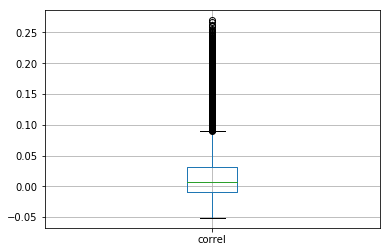

In [12]:
corr_df.boxplot()
plt.show()

C:\Users\Dell_PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


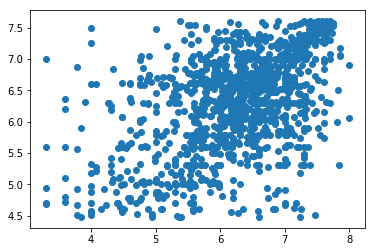

In [13]:
plt.scatter(np.log10(d_train.loc[:,"58232a6fb"]),np.log10(d_train.loc[:,"target"]))
plt.show()

In [14]:
#np.corrcoef?
#np.log10?
temp1=np.log10(d_train.loc[:,"58232a6fb"])
#np.corrcoef(np.log10(rd1.loc[:,"58232a6fb"]),np.log10(rd1.loc[:,"target"]))

C:\Users\Dell_PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


In [15]:
print(d_train.shape)
print(temp1.shape)

(3567, 4992)
(3567,)


In [16]:
temp1.dropna?

In [17]:
temp1.min()

-inf

In [18]:
type(temp1)

pandas.core.series.Series

In [19]:
d_train.loc[:,["58232a6fb"]].head()

,58232a6fb
2373,0.00
1757,1563411.76
1332,0.00
2990,72200000.00
365,0.00


In [20]:
d_train.target.head()

2373      300000.00
1757      115636.36
1332    12066666.66
2990    11400000.00
365       850000.00
Name: target, dtype: float64

##  log transform of target

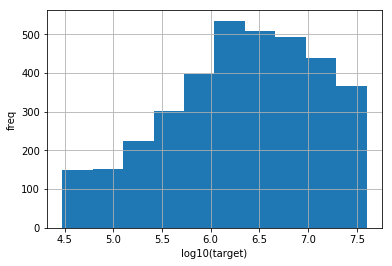

In [37]:
tar_log=np.log10(d_train.target)
tar_log.hist()
plt.xlabel('log10(target)')
plt.ylabel('freq')
#plt.xticks()
plt.show()

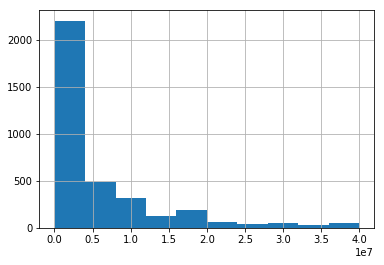

In [38]:
d_train.target.hist()
plt.show()

#### log transform seems a better choice

In [64]:
x=d_train[d_train.loc[:,'target']==0]

In [65]:
x.shape

(0, 4992)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1fdac4cf400>],
 'cbars': <matplotlib.collections.LineCollection at 0x1fdac4cfac8>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1fdac4cf358>,
 'cmins': <matplotlib.collections.LineCollection at 0x1fdac4cf828>}

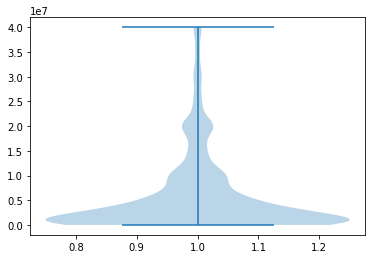

In [66]:
plt.violinplot(d_train.target)

In [70]:
x=d_train[d_train.loc[:,'58232a6fb']!=0]

In [72]:
np.corrcoef(np.log10(x['target']),np.log10(x['58232a6fb']))

array([[ 1.        ,  0.48469767],
       [ 0.48469767,  1.        ]])

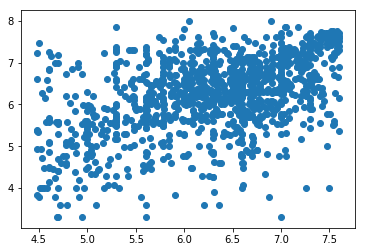

In [73]:
plt.scatter(np.log10(x['target']),np.log10(x['58232a6fb']))

## pretty good correlation with 58232a6fb once we remove zero values

## Checking for a different variable

In [113]:
corr_df=corr_df.sort_values('correl',ascending=False)
corr_df.head(n=10)

,var_name,correl
3772,58232a6fb,0.269833
4717,555f18bd3,0.266983
3514,cbbc9c431,0.261837
4388,429687d5a,0.261154
2463,5bc7ab64f,0.260976
4964,6b119d8ce,0.255209
2501,58e2e02e6,0.253996
2756,9fd594eec,0.252733
3397,a61aa00b0,0.251511
4660,f1851d155,0.250866


In [114]:
var1='9fd594eec'
x=d_train[d_train.loc[:,var1]!=0]
print(x.shape)

(1223, 4992)


In [115]:
np.corrcoef(np.log10(x.target),np.log10(x.loc[:,var1]))

array([[ 1.        ,  0.51226572],
       [ 0.51226572,  1.        ]])

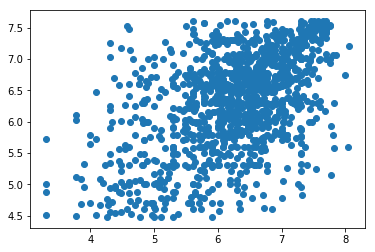

In [116]:
plt.scatter(np.log10(x.loc[:,var1]),np.log10(x.target))
#plt.scatter(x.target,x.loc[:,'cbbc9c431'])
plt.show()


## collecting top 100 correlated variables and creating an indicator variable

In [166]:
top100=corr_df.iloc[0:50,0].values

In [167]:
bool_ind=np.repeat(False,repeats=d_train.shape[0])
print(bool_ind.shape)
for var in top100:
    bool_ind=(bool_ind)|(d_train.loc[:,var]!=0)
    #ind=d_train.loc[:,var]!=0
print(bool_ind.shape)

(3567,)
(3567,)


In [168]:
bool_ind.value_counts()

True     3032
False     535
dtype: int64

In [169]:
req_vars=np.append(top100,'target')
d_train2=d_train[bool_ind].loc[:,req_vars]

In [170]:
d_train2.shape

(3032, 51)

In [171]:
d_train2.head().T

,2373,1757,1332,2990,365
58232a6fb,0.00,1563411.76,0.00,72200000.0,0.00
555f18bd3,0.00,1470000.00,0.00,0.0,0.00
cbbc9c431,0.00,1470000.00,0.00,0.0,0.00
429687d5a,0.00,0.00,0.00,0.0,0.00
5bc7ab64f,0.00,1470000.00,0.00,0.0,0.00
6b119d8ce,0.00,1470000.00,0.00,0.0,0.00
58e2e02e6,0.00,1563411.76,900000.00,0.0,0.00
9fd594eec,0.00,1563411.76,0.00,72200000.0,60000000.00
a61aa00b0,0.00,1470000.00,0.00,0.0,0.00
f1851d155,0.00,1470000.00,0.00,0.0,0.00


In [181]:
d_train2.replace?

In [182]:
d_train4=d_train2.replace(0,0.01)
d_train4.shape

(3032, 51)

In [197]:
d_train5=d_train4.applymap(np.log10)


In [198]:
d_train5=d_train5.replace(-2,0)

In [200]:
d_train5.corr()['target'].sort_values(ascending=False)

target       1.000000
e1d0e11b5    0.116139
f190486d6    0.111904
f3cf9341c    0.101041
ba4ceabc5    0.096367
555f18bd3    0.092342
3a62b36bd    0.088505
9fd594eec    0.088115
f14b57b8f    0.087582
aeff360c7    0.086072
122c135ed    0.085007
e4159c59e    0.084878
58e2e02e6    0.084757
0e1f6696a    0.084045
f1851d155    0.084009
c671db79e    0.083274
415094079    0.077751
a61aa00b0    0.075136
53a550111    0.074791
d79736965    0.074140
ac30af84a    0.072867
64534cc93    0.071454
38e6f8d32    0.070646
26417dec4    0.070464
174edf08a    0.067875
429687d5a    0.067772
cbbc9c431    0.067328
134ac90df    0.067025
d4c1de0e2    0.066388
96b6bd42b    0.066319
ea4887e6b    0.063986
f296082ec    0.063801
51707c671    0.062316
7af000ac2    0.062270
6eef030c1    0.060427
e8d9394a0    0.058919
2570e2ba9    0.057013
6d2ece683    0.054755
41bc25fef    0.053802
15ace8c9f    0.052620
6b119d8ce    0.052332
5bc7ab64f    0.051469
58232a6fb    0.047203
1fd0a1f2a    0.046370
ad207f7bb    0.044536
1702b5bf0 

In [63]:
## COLLECTING HIGHLY CORRELATED VARIABLES
corr_df_hc=corr_df[(corr_df['correl']>=0.02)|(corr_df['correl']<=-0.02)]
print(corr_df_hc.shape)

(1861, 2)


In [64]:
imp_vars=corr_df_hc['var_name']
type(imp_vars)

pandas.core.series.Series

In [65]:
x_tr=d_train.loc[:,imp_vars]

In [66]:
x_tr.shape

(3567, 1861)

In [67]:
type(x_tr)

pandas.core.frame.DataFrame

In [68]:
x_variance=x_tr.apply(np.var,axis='rows')

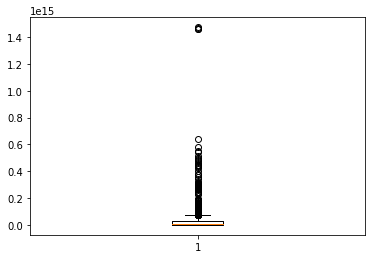

In [69]:
plt.boxplot(x_variance)
plt.show()

## PCA

In [70]:
pca1=PCA()
pca1=pca1.fit(x_tr)

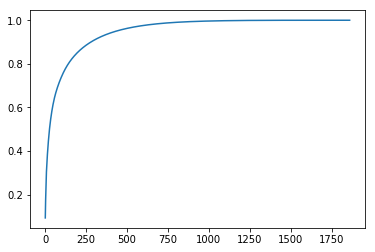

In [71]:
ex_var=pca1.explained_variance_ratio_.cumsum()

plt.plot(ex_var)
plt.show()

In [100]:
x_pca_tr=pca1.transform(x_tr)
print('shape of x_tr: '+str(x_tr.shape))
print('shape_of_x_pca_tr:'+str(x_pca_tr.shape))

shape of x_tr: (3567, 1861)
shape_of_x_pca_tr:(3567, 1861)


In [101]:
x_te=d_test.loc[:,imp_vars]
x_pca_te=pca1.transform(x_te)

In [102]:
x_pca_tr=pd.DataFrame(x_pca_tr)
x_pca_te=pd.DataFrame(x_pca_te)

In [103]:
## taking firt few significant PCs
n_comp=750
x_pca_tr=x_pca_tr.iloc[:,0:n_comp]
x_pca_te=x_pca_te.iloc[:,0:n_comp]

In [104]:
x_pca_tr.shape

(3567, 750)

## Testing a model

In [105]:
y_tr=d_train.loc[:,'target']
y_te=d_test.loc[:,'target']

In [108]:
f1=RandomForestRegressor(bootstrap=True,n_estimators=200,min_samples_leaf=10,n_jobs=2,oob_score=True,random_state=2018)

In [109]:
f1=f1.fit(X=x_pca_tr,y=y_tr)

In [110]:
f1.oob_score_

0.17848714235453356

In [111]:
y_pred=f1.predict(X=x_pca_tr)

In [112]:
np.sqrt(mean_squared_log_error(y_true=d_train.loc[:,'target'],y_pred=y_pred))

1.5333126956837688

In [113]:
y_pred_test=f1.predict(X=x_pca_te)

In [115]:
np.sqrt(mean_squared_log_error(y_true=y_te,y_pred=y_pred_test))

1.9032664697005435

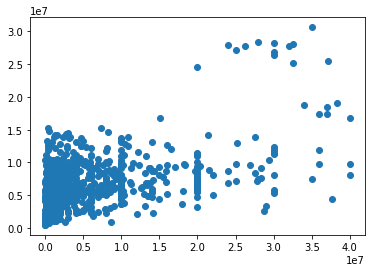

In [116]:
plt.scatter(d_test.loc[:,'target'],y_pred_test)
plt.show()

## Elastic Net

In [165]:
ElasticNet?

In [177]:
f2=ElasticNet(random_state=2018,l1_ratio=1,normalize=True)

In [178]:
y_tr=d_train.loc[:,'target']

In [179]:
f2=f2.fit(X=x_tr,y=y_tr)

C:\Users\Dell_PC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [180]:
x_tr.shape

(3567, 1052)

In [182]:
y_pred_test2=f2.predict(d_test.loc[:,imp_vars])

## Scoring on test test

In [51]:
test_df=pd.read_csv('test.csv')
print('shape of test data:',str(test_df.shape))

shape of test data: (49342, 4992)


In [53]:
test_df.loc[:,'target']=f1.predict(test_df.loc[:,imp_vars])

In [54]:
test_df.loc[:,['ID','target']].head()

,ID,target
0,000137c73,8.407776e+06
1,00021489f,4.014072e+06
2,0004d7953,7.463728e+06
3,00056a333,1.101414e+07
4,00056d8eb,4.311126e+06


In [57]:
test_df.loc[:,['ID','target']].to_csv('sub_20180625.csv',index=False)